In [ ]:
import rioxarray as rxr
from pprint import pprint
import numpy as np
import gudhi

: 

In [5]:

# Define the path to the DEM file.
# This path is relative to the location of the notebook.
dem_path = r"D:\OneDrive - University of Georgia\multiscale_tda_geomorphology\data\raw\dem_30m\USGS_1_n25w081.tif"

# Open the DEM file using rioxarray.
# This loads the data and metadata into a powerful xarray.DataArray object.
# We use .squeeze() to remove the 'band' dimension since it's a single-band raster.
try:
    dem_da = rxr.open_rasterio(dem_path).squeeze()

    # Print the shape and CRS to confirm it loaded correctly.
    print(f"The shape of the DEM DataArray is: {dem_da.shape}")
    print(f"The CRS of the DEM is: {dem_da.rio.crs}")
    print("-" * 30)

    # Now you can work with `dem_da` directly.
    # xarray DataArrays have built-in methods for calculations, which are often
    # aware of 'no data' values. We use .item() to extract the scalar value.
    print("Basic Statistics:")
    print(f"Min value: {dem_da.min().item():.2f}")
    print(f"Max value: {dem_da.max().item():.2f}")
    print(f"Mean value: {dem_da.mean().item():.2f}")
    print("-" * 30)

    # If you ever need the raw NumPy array for a library that requires it,
    # you can access it with the .values attribute.
    dem_numpy_array = dem_da.values
    print(f"The underlying data type is: {type(dem_numpy_array)}")

except Exception as e:
    raise Exception(e)

The shape of the DEM DataArray is: (10812, 10812)
The CRS of the DEM is: EPSG:4269
------------------------------
Basic Statistics:
Min value: -999999.00
Max value: 16.58
Mean value: -1109.57
------------------------------
The underlying data type is: <class 'numpy.ndarray'>


In [6]:
pprint((dem_numpy_array > -3313).astype(int))

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10812, 10812))


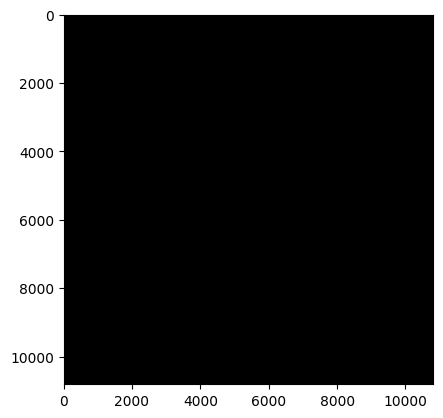

In [8]:
import matplotlib.pyplot as plt

np_array = (dem_numpy_array > 1545.41).astype(int)

fig, ax = plt.subplots()
plt.imshow(-1*np_array, cmap="gray")

In [9]:
import gudhi

def __heightMatrix(self, angle: float, size: int) -> np.ndarray:
        heightMatrix = np.zeros((size, size), np.float32)
        step = self.scale/size
        for i in range(size):
            for j in range(size):
                heightMatrix[i, j] = float(np.cos(angle)*((size-i)*step+ -1) + np.sin(angle)*((j)*step -1))
        return heightMatrix

def detect(self, image: np.ndarray, size: int, alpha: float = 0.5) -> tuple:
    pers_imager = pimg(pixel_size=.1,birth_range=(-np.sqrt(2)-.01,np.sqrt(2)+.01))
    H0_Block = []
    H1_Block = []
    for direction in self.directions:
        heightMatrix = self.__heightMatrix(direction, size)
        Image = np.round((image > alpha)).reshape((size,size))
        heightImgMatrix = Image * heightMatrix
        heightImgMatrix[heightImgMatrix == 0] = float('inf')
        Complex = gudhi.CubicalComplex(top_dimensional_cells=heightImgMatrix)
        Complex.persistence()
        D0 = Complex.persistence_intervals_in_dimension(0)
        D1 = Complex.persistence_intervals_in_dimension(1)
        D0[D0 == float('inf')] = self.scale*np.sqrt(2)+.01
        D1[D1 == float('inf')] = self.scale*np.sqrt(2)+.01
        pers_img_0 = pers_imager.transform(D0)
        pers_img_1 = pers_imager.transform(D1)
        H0_Block.append(pers_img_0.reshape(pers_img_0.shape[0]*pers_img_0.shape[1],))
        H1_Block.append(pers_img_1.reshape(pers_img_0.shape[0]*pers_img_0.shape[1],))
    return (H0_Block, H1_Block)